In [2]:
import math
import numpy as np
import pandas as pd
import scipy as sc
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Привиденная энергия вылетающего электрона: $\epsilon_e = \frac{E_{\nu}-Q_k}{m_e} + 1$

In [3]:
def e_e_func(E_nu, E_k, Q_EC):
    #Считаем привиденную энергию вылетающего электрона. Если энергия налетающего нейтрино E_nu
    #меньше порога, возвращаем 0 для обнуления итогового сечения
    #E_nu in MeV
    q=Q_k_func(E_k, Q_EC) #порог реакции
    if E_nu>q: return 1+(E_nu-q)/0.511
    else: return 0 

Привиденный импульс электрона: $\pi_e=\sqrt{\epsilon_e^2 -1}$

In [4]:
def Pi_e_func(e_e):
    #Привиденный импульс электрона, вычисляется через привиденную энергию; ** означает степень  
    return np.sqrt(e_e**2 - 1)


Реакция 
$ {\nu}_e + ^{71}_{31}Ga \rightarrow ^{71}_{32}Ge + e^{-}$

### Ферми функция из таблиц Суслова. Z - атомный номер распадающегося ядра

In [5]:
Suslov_data = pd.read_excel('../../fermi_func_tables/suslov/suslov_Z=31.xls')
#Fermi_func.info()

def Suslov_func(e_e):
    #input энергия электрона в кэв
    return np.interp(x = e_e, xp = Suslov_data['E_kev'], 
                     fp = Suslov_data['Z=31'])
def Suslov_func2(e_e):
    #input энергия электрона в кэв
    cs = interp1d(Suslov_data['E_kev'], Suslov_data['Z=31'], kind='cubic')
    return cs(e_e)

In [6]:
Suslov_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
E_kev    100 non-null int64
Z=31     100 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


In [7]:
e_e = np.linspace(0,10, 1000)

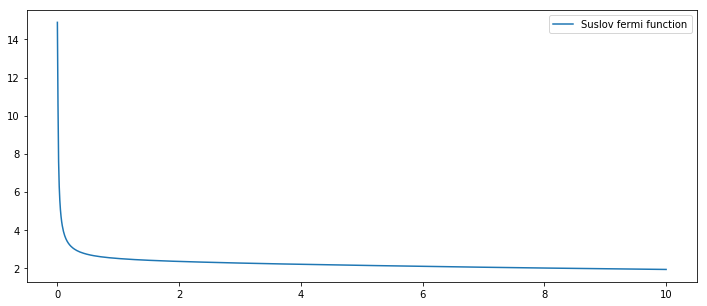

In [8]:
plt.figure(figsize=(12,5))
plt.plot(e_e, Suslov_func(e_e*1000), label='Suslov fermi function')
plt.legend()
plt.show()

### Fermi-function from Numerical Tables for Beta-Decay and Electron Capture 
### Z и A даны для дочернего ядра

In [9]:
Janecki_data = pd.read_excel('../../fermi_func_tables/from_1968/Z=32.xls')
Janecki_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
p       48 non-null float64
FoL0    48 non-null float64
dtypes: float64(2)
memory usage: 848.0 bytes


In [10]:
def Janecki_func(e_e):
    #input энергия электрона в кэв
    E = 1 + e_e/511 # полная энергия электрона в единицах mc^2
    p = Pi_e_func(E)
    return np.interp(x = p, xp = Janecki_data['p'], 
                     fp = Janecki_data['FoL0'])

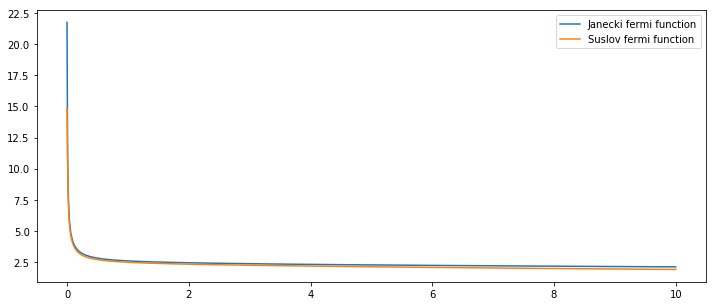

In [11]:
plt.figure(figsize=(12,5))
plt.plot(e_e, Janecki_func(e_e*1000), label='Janecki fermi function')
plt.plot(e_e, Suslov_func(e_e*1000), label='Suslov fermi function')
plt.legend()
plt.show()

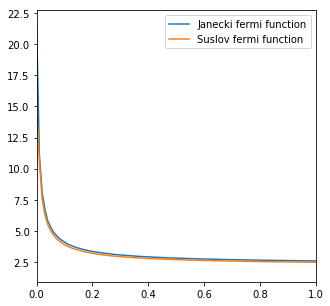

In [12]:
plt.figure(figsize=(5,5))
plt.plot(e_e, Janecki_func(e_e*1000), label='Janecki fermi function')
plt.plot(e_e, Suslov_func(e_e*1000), label='Suslov fermi function')
plt.xlim(0,1)
plt.legend()
plt.show()

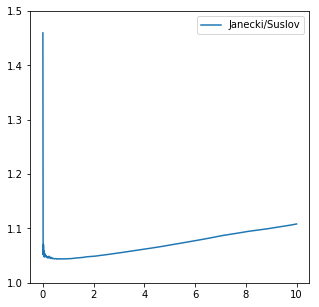

In [13]:
plt.figure(figsize=(5,5))
plt.plot(e_e, Janecki_func(e_e*1000)/ Suslov_func(e_e*1000), label='Janecki/Suslov')
plt.legend()
#plt.xlim(0,1)
plt.ylim(1,1.5)
plt.show()